# Path

In [1]:
import os

In [2]:
# working_path = "/media/luping/work/CH4/cell-opt/M0/moveon/"
# enfile = "M0-cell-opt-1.ener"
# outfile = "M0-cell-opt-1.restart.out"
# totalenfile = "totalen" # total energy from cp2k.inp.out
# pdbfile = "M0-cell-opt-pos-1.pdb"

working_path = "/media/luping/work/CH4/cell-opt/D0/moveon2/"
enfile = "D0-cell-opt-1.ener"
outfile = "cp2k.inp.out"
totalenfile = "totalen" # total energy from cp2k.inp.out
pdbfile = "D0-cell-opt-pos-1.pdb"

os.chdir(working_path)

# Energy

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,
            names=['Step Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons Qty[a.u.]', 'UsedTime[s]'])

/tmp/ipykernel_104795/1017420085.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  ener = pd.read_csv(enfile, sep='\s+', header=0, index_col=False,


<AxesSubplot:xlabel='Time[fs]'>

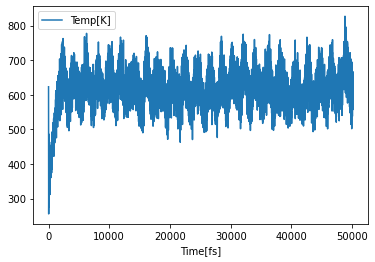

In [5]:
ener.plot(x="Time[fs]", y="Temp[K]")

In [6]:
ener.loc[:, "Time[fs]"]

0             0.0
1             0.5
2             1.0
3             1.5
4             2.0
           ...   
100252    50117.0
100253    50117.5
100254    50118.0
100255    50118.5
100256    50119.0
Name: Time[fs], Length: 100257, dtype: float64

<AxesSubplot:xlabel='Time[fs]'>

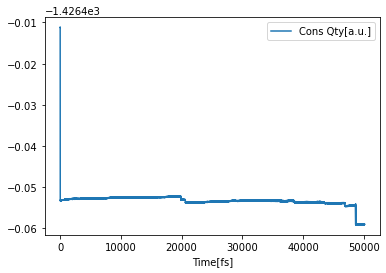

In [7]:
ener.plot(x="Time[fs]", y="Cons Qty[a.u.]")

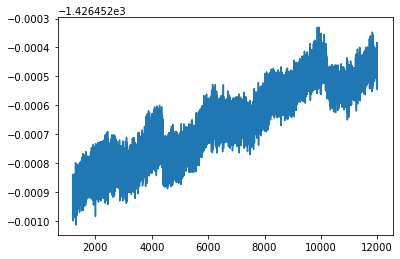

In [8]:
plt.plot(ener.loc[2400:24000, "Time[fs]"], ener.loc[2400:24000, "Cons Qty[a.u.]"])

<AxesSubplot:xlabel='Time[fs]'>

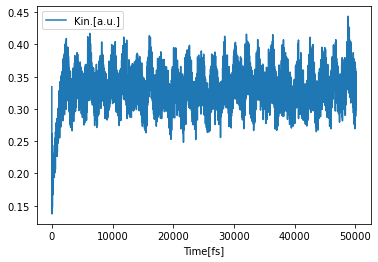

In [9]:
ener.plot(x="Time[fs]", y="Kin.[a.u.]")

<AxesSubplot:xlabel='Time[fs]'>

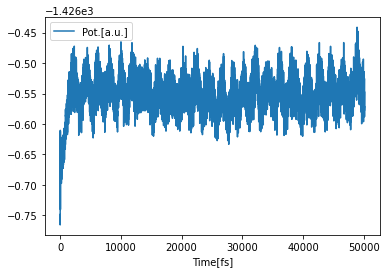

In [10]:
ener.plot(x="Time[fs]", y="Pot.[a.u.]")

In [12]:
ener["Kin.[a.u.]"] + ener["Pot.[a.u.]"] - ener["Cons Qty[a.u.]"]

0        -0.003016
1        -0.002481
2        -0.002210
3        -0.002198
4        -0.002442
            ...   
100252    0.227837
100253    0.227704
100254    0.227591
100255    0.227502
100256    0.227438
Length: 100257, dtype: float64

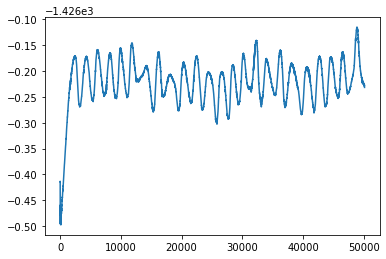

In [11]:
plt.plot(ener["Time[fs]"], ener["Kin.[a.u.]"]+ener["Pot.[a.u.]"])

The total energy in .out file and .pdb (.xyz) file are identical.

So use the smaller file .out

In [13]:
com = 'grep "ENERGY| Total FORCE_EVAL" ' + outfile + ' > ' + totalenfile
os.system(com)
totalen = pd.read_csv(totalenfile, header=None, sep=':')
del totalen[0]
totalen.columns = ["total energy"]

Text(0, 0.5, 'Total energy [a.u.]')

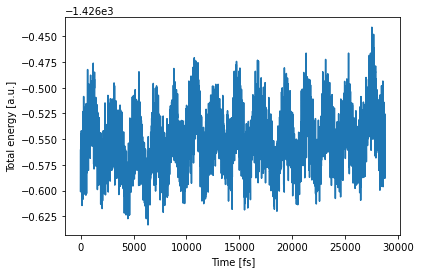

In [14]:
timestep = 0.5
plt.plot((totalen.index.values + 1) * timestep , totalen)
plt.xlabel("Time [fs]")
plt.ylabel("Total energy [a.u.]")

# Cell

In [15]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
# pdbfile = "/home/luping/work/CH4/cell-opt/D0/D0-cell-opt-pos-1.pdb"
# pdbfile = "/home/luping/work/CH4/cell-opt/M0/moveon/M0-cell-opt-pos-1.pdb"
# dirpath = os.path.dirname(pdbfile)
# cell = os.path.join(dirpath, "cell")
com = "grep CRYST1 {} > cell".format(pdbfile)
os.system(com)

0

In [17]:
abc = pd.read_csv("cell", header=None, sep="\s+")
abc

,0,1,2,3,4,5,6
0,CRYST1,13.716,13.716,14.863,90.0,90.0,119.99
1,CRYST1,13.716,13.715,14.862,90.0,90.0,119.99
2,CRYST1,13.715,13.715,14.862,90.0,90.0,119.99
3,CRYST1,13.715,13.715,14.861,90.0,90.0,119.99
4,CRYST1,13.715,13.715,14.862,90.0,90.0,119.99
...,...,...,...,...,...,...,...
100252,CRYST1,13.813,13.813,14.968,90.0,90.0,119.99
100253,CRYST1,13.811,13.811,14.965,90.0,90.0,119.99
100254,CRYST1,13.808,13.808,14.963,90.0,90.0,119.99
100255,CRYST1,13.806,13.806,14.960,90.0,90.0,119.99


In [18]:
timestep = 0.5
time = (abc.index.values+1)*timestep/1000

p1 = np.polyfit(time[10000:], abc.iloc[10000:,1], 0)
p2 = np.polyfit(time[10000:], abc.iloc[10000:,2], 0)
p3 = np.polyfit(time[10000:], abc.iloc[10000:,3], 0)
fn1 = np.poly1d(p1)
fn2 = np.poly1d(p2)
fn3 = np.poly1d(p3)

In [19]:
# timestep = 0.5
# time = (abc.index.values+1)*timestep/1000

# p1 = np.polyfit(time, abc.iloc[:,1], 0)
# p2 = np.polyfit(time, abc.iloc[:,2], 0)
# p3 = np.polyfit(time, abc.iloc[:,3], 0)
# fn1 = np.poly1d(p1)
# fn2 = np.poly1d(p2)
# fn3 = np.poly1d(p3)

In [20]:
print("ABC {:.6f} {:.6f} {:.6f}".format(p1[0], p2[0], p3[0]))

ABC 13.795579 13.795420 14.948809


In [21]:
(p1[0] - abc.iloc[0,1]) / abc.iloc[0,1]

0.0058019135681538795

In [22]:
(p2[0] - abc.iloc[0,2]) / abc.iloc[0,2]

0.005790313078753463

In [23]:
(p3[0] - abc.iloc[0,3]) / abc.iloc[0,3]

0.005773316391952727

In [24]:
time[10000:].shape

(90257,)

In [25]:
fn1(time[10000:]).shape

(90257,)

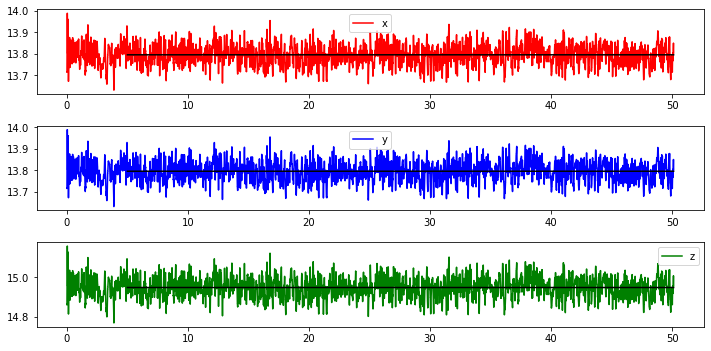

In [26]:
fig, ax = plt.subplots(3,1, figsize=(10,5))
fig.tight_layout()
ax[0].plot(time, abc.iloc[:,1], color='red', label="x")
ax[1].plot(time, abc.iloc[:,2], color='blue', label="y")
ax[2].plot(time, abc.iloc[:,3], color='green', label="z")
ax[0].plot(time[10000:], fn1(time[10000:]), color='black')
ax[1].plot(time[10000:], fn2(time[10000:]), color='black')
ax[2].plot(time[10000:], fn3(time[10000:]), color='black')
ax[0].legend()
ax[1].legend()
ax[2].legend()